In [1]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                'python-machine-learning-book-2nd-edition'
                '/master/code/ch10/housing.data.txt', header = None,
                sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
            'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Text(0, 0.5, 'Price [MEDV]')

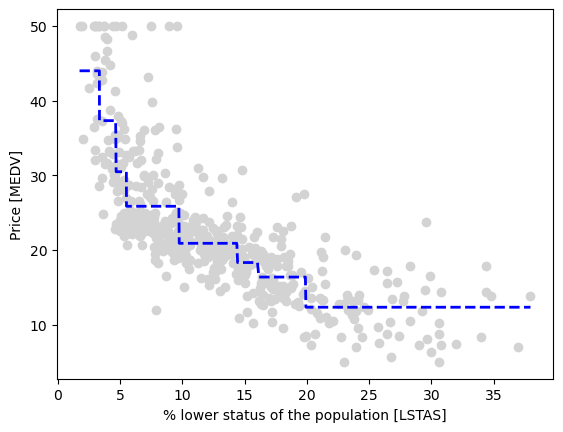

In [3]:
import matplotlib.pyplot as plt

X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)

# Training the model

tree.fit(X,y)
sort_idx = X.flatten().argsort()
plt.scatter(X,y, color='lightgray')
plt.plot(X[sort_idx], tree.predict(X)[sort_idx], color='blue', lw=2, linestyle='--')
plt.xlabel('% lower status of the population [LSTAS]')
plt.ylabel('Price [MEDV]')

In [4]:
# Random Forest Regressor -- define non-linaerity assumptions

from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=1) 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error',
                               random_state=1, n_jobs=-1)  # -1 means no limit for processors to do the prediction 

In [5]:

# Training the model based on features of X and y

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE Train : %.3f, Test : %.3f' %(mean_squared_error(y_train,y_train_pred), 
                                        mean_squared_error(y_test, y_test_pred)))
print('R^2 Score Train : %.3f, Test : %.3f' %(r2_score(y_train,y_train_pred), 
                                        r2_score(y_test, y_test_pred)))

MSE Train : 1.644, Test : 11.085
R^2 Score Train : 0.979, Test : 0.877


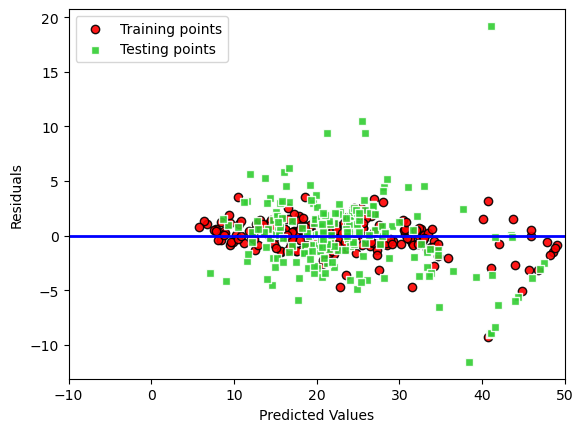

In [6]:
# Plotting the graph based on prediction

plt.scatter(y_train_pred, y_train_pred-y_train, c='red', edgecolors='black', marker='o', alpha=0.9, label='Training points')
plt.scatter(y_test_pred,y_test_pred-y_test, c='limegreen', edgecolors='white', marker='s', alpha=0.9, label='Testing points')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, colors='blue')
plt.xlim([-10,50])  # Setting the limits for x axis
plt.show()

In [ ]:
#  Chapter 5 Metrics

In [16]:
# from sklearn.metrics import * # for importing all metrics

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

from sklearn. metrics import mean_absolute_error

from sklearn.metrics import mean_squared_log_error

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.metrics import explained_variance_score

In [9]:
r2=r2_score(y_test, y_test_pred)
print("R2-squared Error", r2)

R2-squared Error 0.8772555925989014


In [10]:
mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error", mse)

Mean squared error 11.085384101576372


In [11]:
mae = mean_squared_error(y_test, y_test_pred)
print("Mean squared error of regression model", mae)

Mean squared error of regression model 11.085384101576372


In [17]:
msle = mean_squared_log_error(y_test, y_test_pred)
print("Mean squared logarithmic error of regression model", msle)

Mean squared logarithmic error of regression model 0.022279332590573266
